<a href="https://colab.research.google.com/github/Muskan520/Stock-prediction-models/blob/main/fbprophet_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import math



In [ ]:
df= pd.read_csv('/content/NFLX.csv')
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-08,90.714287,90.815712,88.995712,89.604286,89.604286,11148900
1,2015-06-09,89.334290,92.714287,89.334290,92.449997,92.449997,22024800
2,2015-06-10,93.395714,98.970001,93.225716,95.871429,95.871429,57121400
3,2015-06-11,96.889999,96.918571,94.087143,95.094284,95.094284,26623100
4,2015-06-12,94.915710,95.342857,94.124283,94.418571,94.418571,10278800
...,...,...,...,...,...,...,...
1505,2021-05-28,504.399994,511.760010,502.529999,502.809998,502.809998,2910300
1506,2021-06-01,504.010010,505.410004,497.739990,499.079987,499.079987,2482600
1507,2021-06-02,499.820007,503.220001,495.820007,499.239990,499.239990,2269000
1508,2021-06-03,495.190002,496.660004,487.250000,489.429993,489.429993,3887400


In [ ]:
df.shape

(1510, 7)

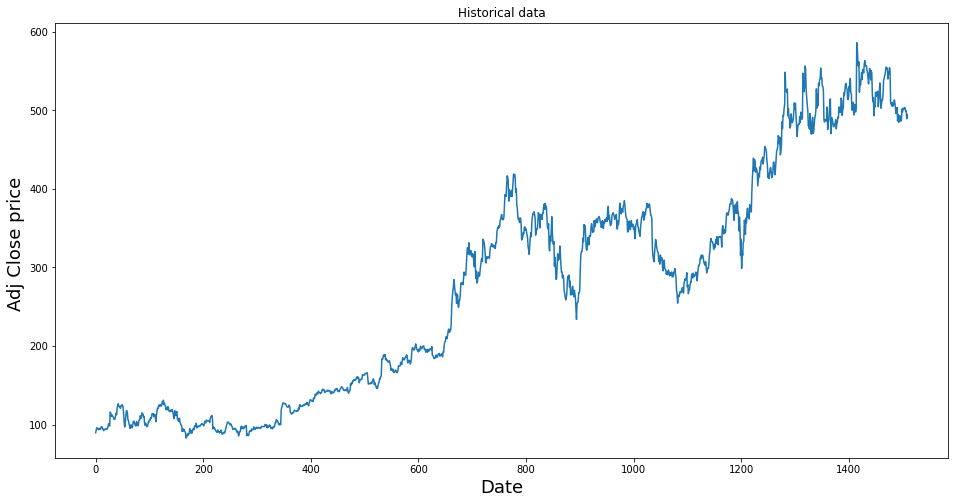

In [ ]:
#Visulaize the data
plt.figure(figsize=(16,8))
plt.title('Historical data')
plt.plot(df['Adj Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Close price ',fontsize=18)
plt.show()


In [ ]:
# Select only the important features i.e. the date and price
data = df[["Date","Adj Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Adj Close":"y"}) #renaming the columns of the dataset
data.head(5)




,ds,y
0,2015-06-08,89.604286
1,2015-06-09,92.449997
2,2015-06-10,95.871429
3,2015-06-11,95.094284
4,2015-06-12,94.418571


In [ ]:

m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data (not splitting in train and test data.Training all data)

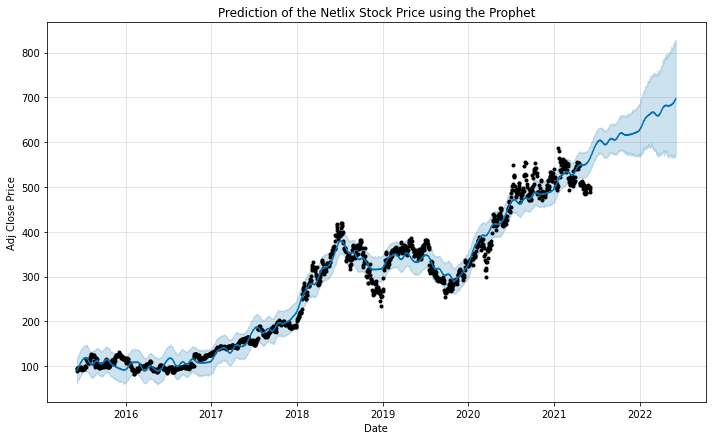

In [ ]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Netlix Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Adj Close Price")
plt.show()